## Linear Regression

Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between the dependent variable and one or more independent features by fitting a linear equation to observed data.

When there is only one independent feature, it is known as Simple Linear Regression, and when there are more than one feature, it is known as Multiple Linear Regression.

#### 1. Simple Linear Regression
This is the simplest form of linear regression, and it involves only one independent variable and one dependent variable. The equation for simple linear regression is:

       Y = β0 + β1X
   
where:

- Y is the dependent variable
- X is the independent variable
- β0 is the intercept
- β1 is the slope

#### 2. Multiple Linear Regression
This involves more than one independent variable and one dependent variable. The equation for multiple linear regression is:

      Y = β0 + β1X1 + β2X2 + ... + βnXn
      
where:

- Y is the dependent variable
- X1, X2, …, Xp are the independent variables
- β0 is the intercept
- β1, β2, …, βn are the slopes


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [27]:
# Dependent Variables
X = df[['Salary']].values
print(X)

[[ 39343]
 [ 46205]
 [ 37731]
 [ 43525]
 [ 39891]
 [ 56642]
 [ 60150]
 [ 54445]
 [ 64445]
 [ 57189]
 [ 63218]
 [ 55794]
 [ 56957]
 [ 57081]
 [ 61111]
 [ 67938]
 [ 66029]
 [ 83088]
 [ 81363]
 [ 93940]
 [ 91738]
 [ 98273]
 [101302]
 [113812]
 [109431]
 [105582]
 [116969]
 [112635]
 [122391]
 [121872]]


In [28]:
# Independent Variables
y = df['YearsExperience'].values
print(y)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


In [29]:
'''
test_size=0.5:  This parameter specifies the proportion of the dataset to include in the test split. In this case, 
                0.5 means 50% of the data will be used for testing, and the remaining 50% will be used for training.

random_state=0: This parameter ensures reproducibility of the split. By setting a seed value (in this case, 0), 
                the function will always produce the same split when you run it multiple times. 
                This is important for ensuring consistent results in your experiments.
                
'''
# splitting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state = 0)

In [31]:
# define a model
model = LinearRegression()

# providing training data
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_predicted = model.predict(X_test)
print(y_predicted)

[ 1.29549517 10.10927918  3.30998514  3.94889599  9.54480556  8.76003939
  9.09360145  3.17599813  6.01752212  7.91374539  3.26428172  4.2415436
  4.07663651  3.72954041  9.21613658]


In [34]:
print(y_test)

[ 1.5 10.3  4.1  3.9  9.5  8.7  9.6  4.   5.3  7.9  2.9  5.1  3.2  4.5
  8.2]


In [38]:
# Create a DataFrame to compare the results
comparison_df = pd.DataFrame({
    'y_test': y_test,
    'y_predicted': y_predicted
})

print(comparison_df)

    y_test  y_predicted
0      1.5     1.295495
1     10.3    10.109279
2      4.1     3.309985
3      3.9     3.948896
4      9.5     9.544806
5      8.7     8.760039
6      9.6     9.093601
7      4.0     3.175998
8      5.3     6.017522
9      7.9     7.913745
10     2.9     3.264282
11     5.1     4.241544
12     3.2     4.076637
13     4.5     3.729540
14     8.2     9.216137


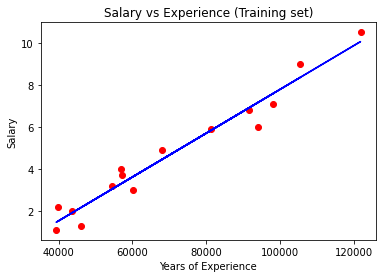

In [40]:
# Visualizing the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

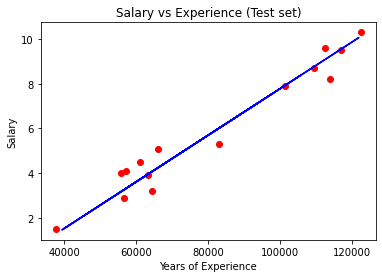

In [42]:
# Visualizing the Testing set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [45]:
# Evaluate the model for linear model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate R² score
r2 = r2_score(y_test, y_predicted)

# Calculate other metrics
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predicted)

# Print the scores
print(f"R² score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


R² score: 0.9518
Mean Squared Error (MSE): 0.3617
Root Mean Squared Error (RMSE): 0.6014
Mean Absolute Error (MAE): 0.4858


#### R² Score (0.9518): 
This score indicates that approximately 95.18% of the variance in the dependent variable (y_test) is predictable from the independent variable (X_test). This is a very high score, suggesting that your model is performing well and explaining most of the variability in the data.

#### Mean Squared Error (MSE) (0.3617): 
MSE measures the average squared difference between the actual values and the predicted values. A lower MSE indicates better model performance. In this case, 0.3617 is relatively low, indicating that the model's predictions are quite close to the actual values.

#### Root Mean Squared Error (RMSE) (0.6014): 
RMSE is the square root of MSE, providing an error metric in the same units as the target variable. An RMSE of 0.6014 suggests that, on average, the model's predictions are off by approximately 0.6014 units. This gives a more interpretable measure of prediction error.

#### Mean Absolute Error (MAE) (0.4858): 
MAE measures the average absolute difference between the actual and predicted values. An MAE of 0.4858 means that, on average, the model's predictions are off by about 0.4858 units. This is a good indicator of the model's accuracy in terms of absolute deviations.